# DeepAR metrics
Model: DeepAR

Dataset: Electricity

In this notebook we investigate the difference in evaulation scores when the same model is trained and tested multiple times with the same settings but different random seeds. We calculate the difference in evaulation metrics between the best and worst 10 repetitions, and also explore if the best and worst models are consistently good or bad across all timeseries.

In [1]:
import matplotlib.pyplot as plt

from src.metrics import *


In [2]:
experiment_path = "/home/dev/deepts/experiments/deep_ar/electricity"
exp_a = load_data(experiment_path + "/2A")
exp_b = load_data(experiment_path + "/2B")

len(exp_a), len(exp_b)

(100, 100)

In [3]:
exp_a[0].head(10)

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,201.236165,270.903564,235.0,9.791667,8.031874,1.405357,2.867487,0.752681,NaN,30.065092,251.480861,0.708333,270.903529,0.958333,88.063585,1.000000
1,1.0,125.317942,242.571976,2499.0,104.125000,9.577165,1.055340,0.098588,0.104836,NaN,9.247592,100.329409,0.000000,242.571976,0.000000,86.215619,0.666667
2,2.0,0.919626,19.585110,190.0,7.916667,8.673073,0.094090,0.102036,0.108744,NaN,0.542025,10.009835,0.000000,19.585110,0.041667,5.123193,0.750000
3,3.0,4695.366536,1469.179688,10468.0,436.166667,48.398763,1.264822,0.141638,0.154406,NaN,24.475420,467.924799,0.000000,1469.179779,0.000000,1208.211139,0.166667
4,4.0,707.357422,557.221680,4087.0,170.291667,25.383302,0.914679,0.132484,0.143461,NaN,14.331619,196.780096,0.000000,557.221664,0.000000,361.212575,0.333333
5,5.0,5105.947917,1395.734619,15654.0,652.250000,77.445100,0.750927,0.084030,0.088951,NaN,11.228748,545.079230,0.000000,1395.734619,0.000000,890.135999,0.458333
6,6.0,14.523078,80.860832,359.0,14.958333,4.801951,0.701632,0.216288,0.248918,NaN,11.409709,27.356808,0.000000,80.860833,0.041667,55.297079,0.250000
7,7.0,9652.671875,2042.098022,22464.0,936.000000,90.294910,0.942328,0.088633,0.093414,NaN,14.320908,776.736426,0.041667,2042.097961,0.125000,1303.561426,0.458333
8,8.0,3136.926107,819.865173,4315.0,179.791667,39.300618,0.869224,0.159485,0.187072,NaN,21.097176,246.336914,0.000000,819.865166,0.041667,870.356528,0.333333


# Average error over all timeseries. Best and worst 10 repetitions

### Experiment A

In [4]:
report_experiment_results(exp_a)

Most occuring repetitions worst 10 (repetition, frequency): {30: 3, 69: 3, 81: 3, 32: 3, 4: 2, 68: 2, 37: 2, 72: 2, 2: 1, 76: 1, 46: 1, 18: 1, 31: 1, 99: 1, 84: 1, 88: 1, 25: 1, 62: 1}
Most occuring repetitions best 10 (repetition, frequency): {48: 3, 60: 3, 13: 2, 45: 2, 68: 1, 63: 1, 79: 1, 20: 1, 87: 1, 55: 1, 17: 1, 95: 1, 75: 1, 97: 1, 78: 1, 22: 1, 29: 1, 9: 1, 1: 1, 27: 1, 47: 1, 11: 1, 67: 1, 59: 1}
Total number of different repetitions present across metrics (highest): 18
Total number of different repetitions present across metrics (lowest): 24

(MSE) Highest value: 13233288.0
(MSE) Lowest value:  2328430.75
(MSE) Difference between highest and lowest: 10904857.0
(MSE) Difference between average error, 10 highest - 10 lowest: 6624030.5

(MASE) Highest value: 1.997313141822815
(MASE) Lowest value:  0.7379648685455322
(MASE) Difference between highest and lowest error: 1.2593482732772827
(MASE) Difference between the average error, 10 highest - 10 lowest: 0.916245698928833

(MAP

### Experiment B

In [5]:
report_experiment_results(exp_b)

Most occuring repetitions worst 10 (repetition, frequency): {18: 3, 85: 3, 63: 3, 24: 3, 64: 3, 29: 3, 42: 2, 6: 2, 8: 2, 38: 1, 51: 1, 72: 1, 30: 1, 73: 1, 49: 1}
Most occuring repetitions best 10 (repetition, frequency): {82: 3, 80: 2, 0: 2, 39: 2, 27: 2, 33: 2, 50: 2, 66: 1, 54: 1, 71: 1, 92: 1, 60: 1, 49: 1, 8: 1, 15: 1, 65: 1, 44: 1, 75: 1, 93: 1, 43: 1, 14: 1, 57: 1}
Total number of different repetitions present across metrics (highest): 15
Total number of different repetitions present across metrics (lowest): 22

(MSE) Highest value: 16603398.0
(MSE) Lowest value:  2410766.5
(MSE) Difference between highest and lowest: 14192632.0
(MSE) Difference between average error, 10 highest - 10 lowest: 8117986.5

(MASE) Highest value: 2.770820379257202
(MASE) Lowest value:  0.7201024293899536
(MASE) Difference between highest and lowest error: 2.050717830657959
(MASE) Difference between the average error, 10 highest - 10 lowest: 1.2270071506500244

(MAPE) Highest value: 0.2458900362253189

### Both experiments

Repetition numbers above 100 are from experiment B, with repetition number = (repetition number - 100)

In [6]:
report_experiment_results([*exp_a, *exp_b])

Most occuring repetitions worst 10 (repetition, frequency): {185: 3, 163: 3, 129: 3, 164: 3, 32: 3, 118: 2, 81: 2, 142: 2, 37: 2, 69: 1, 172: 1, 4: 1, 151: 1, 124: 1, 68: 1, 108: 1}
Most occuring repetitions best 10 (repetition, frequency): {182: 3, 13: 2, 48: 2, 150: 2, 45: 2, 60: 2, 68: 1, 166: 1, 108: 1, 115: 1, 20: 1, 87: 1, 149: 1, 171: 1, 160: 1, 97: 1, 144: 1, 193: 1, 9: 1, 100: 1, 47: 1, 11: 1, 157: 1}
Total number of different repetitions present across metrics (highest): 16
Total number of different repetitions present across metrics (lowest): 23

(MSE) Highest value: 16603398.0
(MSE) Lowest value:  2328430.75
(MSE) Difference between highest and lowest: 14274967.0
(MSE) Difference between average error, 10 highest - 10 lowest: 9307930.0

(MASE) Highest value: 2.770820379257202
(MASE) Lowest value:  0.7201024293899536
(MASE) Difference between highest and lowest error: 2.050717830657959
(MASE) Difference between the average error, 10 highest - 10 lowest: 1.3392808437347412

(

### The difference between the average of the worst 10 of experiment A vs the best 10 of experiment B and vice versa

In [7]:
exp_a_mse = find_best_and_worst_n(exp_a, "MSE", 10)
exp_a_mase = find_best_and_worst_n(exp_a, "MASE", 10)
exp_a_mape = find_best_and_worst_n(exp_a, "MAPE", 10)

exp_b_mse = find_best_and_worst_n(exp_b, "MSE", 10)
exp_b_mase = find_best_and_worst_n(exp_b, "MASE", 10)
exp_b_mape = find_best_and_worst_n(exp_b, "MAPE", 10)

print(f"(MSE) Difference between average error, worst 10 A vs best 10 B: {exp_a_mse[0][:, 1].mean(axis=0) - exp_b_mse[1][:, 1].mean(axis=0)}")
print(f"(MSE) Difference between average error, worst 10 B vs best 10 A: {exp_b_mse[0][:, 1].mean(axis=0) - exp_a_mse[1][:, 1].mean(axis=0)}")
print()

print(f"(MASE) Difference between average error, worst 10 A vs best 10 B: {exp_a_mase[0][:, 1].mean(axis=0) - exp_b_mase[1][:, 1].mean(axis=0)}")
print(f"(MASE) Difference between average error, worst 10 B vs best 10 A: {exp_b_mase[0][:, 1].mean(axis=0) - exp_a_mase[1][:, 1].mean(axis=0)}")
print()

print(f"(MAPE) Difference between average error, worst 10 A vs best 10 B: {exp_a_mape[0][:, 1].mean(axis=0) - exp_b_mape[1][:, 1].mean(axis=0)}")
print(f"(MAPE) Difference between average error, worst 10 B vs best 10 A: {exp_b_mape[0][:, 1].mean(axis=0) - exp_a_mape[1][:, 1].mean(axis=0)}")

(MSE) Difference between average error, worst 10 A vs best 10 B: 6807870.5
(MSE) Difference between average error, worst 10 B vs best 10 A: 7934146.5

(MASE) Difference between average error, worst 10 A vs best 10 B: 0.9128212928771973
(MASE) Difference between average error, worst 10 B vs best 10 A: 1.2304315567016602

(MAPE) Difference between average error, worst 10 A vs best 10 B: 0.06766875088214874
(MAPE) Difference between average error, worst 10 B vs best 10 A: 0.08981544524431229


# The best and worst metric-value for all timeseries. Which repetitions are most common?

### Experiment A

In [8]:
metric = ["MAPE"]
exp_a_array = calculate_timeseries_means(exp_a, metric)
exp_a_array.shape

(100, 321, 1)

In [9]:
exp_a[0].head(10)

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,201.236165,270.903564,235.0,9.791667,8.031874,1.405357,2.867487,0.752681,NaN,30.065092,251.480861,0.708333,270.903529,0.958333,88.063585,1.000000
321,0.0,115.575724,196.189148,264.0,11.000000,8.026991,1.018383,1.959425,0.691471,NaN,25.286467,155.523003,0.541667,196.189157,0.791667,114.747170,0.875000
642,0.0,163.393504,253.373138,284.0,11.833333,8.025109,1.315523,1.711095,0.723348,NaN,30.185729,208.674636,0.750000,253.373154,0.916667,118.474028,0.916667
963,0.0,122.346710,226.938919,189.0,7.875000,8.024132,1.178419,2.296112,0.849825,NaN,30.549057,260.155552,0.875000,226.938930,0.875000,60.929320,1.000000
1284,0.0,20.895597,73.803986,166.0,6.916667,8.019890,0.383442,0.708178,0.467564,NaN,9.809795,39.441866,0.250000,73.803988,0.416667,65.994525,0.625000
1605,0.0,12.157920,64.909943,154.0,6.416667,8.016509,0.337376,0.573269,0.638578,NaN,7.319823,21.336904,0.041667,64.909945,0.208333,61.844701,0.541667
1926,0.0,19.981907,54.617836,207.0,8.625000,8.010442,0.284097,0.436641,0.270411,NaN,4.838010,32.329502,0.166667,54.617839,0.416667,31.845539,0.875000
1,1.0,125.317942,242.571976,2499.0,104.125000,9.577165,1.055340,0.098588,0.104836,NaN,9.247592,100.329409,0.000000,242.571976,0.000000,86.215619,0.666667
322,1.0,45.173096,134.706421,2351.0,97.958333,9.571517,0.586403,0.058608,0.061032,NaN,3.058030,78.338303,0.000000,134.706425,0.000000,33.296278,0.875000


(array([  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  94,   1,   0,   0,   0, 114,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47,   0,   0,
          0,   0,   0,  53,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   8,   0,   0,
          0,   0,   0,   0,   2,   0,   0,   0,   0]),
 array([88, 62, 37, 32, 68]))

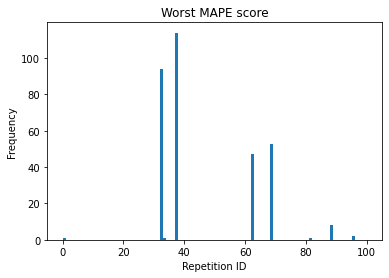

In [38]:
exp_a_max_bin, exp_a_worst_reps = find_n_most_frequent_repetitions(exp_a_array, 5, np.argmax)
plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=exp_a_max_bin)
plt.title(f"Worst {metric} score, exp A")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

exp_a_max_bin, exp_a_worst_reps

(array([ 2,  3,  1,  0,  1,  0,  0,  2,  2,  3,  0, 22,  0, 11,  2,  0,  3,
         1,  1,  1,  1,  2,  0,  1,  2,  0,  1,  5,  3,  4,  0,  0,  0,  1,
         0,  1,  0,  3,  0,  0,  1,  1,  1,  1,  1, 17,  1, 23, 21, 19,  1,
         0,  0,  0,  0, 16,  8,  1,  1,  5, 50,  1,  0,  0,  2,  0,  5,  2,
         1,  0,  0,  0,  2,  0,  0,  3,  5,  2,  0,  5,  0,  0,  0,  7,  0,
         0,  0,  1,  0, 14,  1,  0,  0,  1,  1,  4,  1, 13,  2,  1]),
 array([49, 11, 47, 60, 48]))

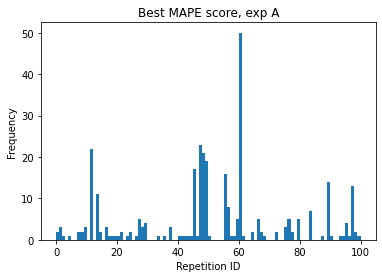

In [39]:
exp_a_min_bin, exp_a_best_reps = find_n_most_frequent_repetitions(exp_a_array, 5, np.argmin)
plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=exp_a_min_bin)
plt.title(f"Best {metric} score, exp A")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

exp_a_min_bin, exp_a_best_reps

### Experiment B

In [12]:
exp_b_array = calculate_timeseries_means(exp_b, metric)
exp_b_array.shape

(100, 321, 1)

(array([  1,   0,   0,   0,   0,   0,   2,   0,  33,   0,   0,   0,   0,
          1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,
          0,   0,   0,  16,   1,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0,   1,   0,   0,   0,   0,   1,   0,   0,   0, 259,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0]),
 array([ 6, 36, 42,  8, 63]))

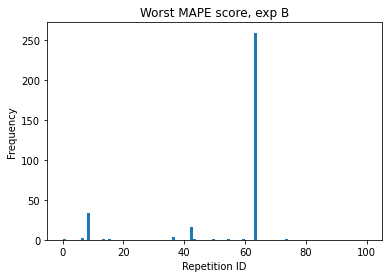

In [40]:
exp_b_max_bin, exp_b_worst_reps = find_n_most_frequent_repetitions(exp_b_array, 5, np.argmax)
plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=exp_b_max_bin)
plt.title(f"Worst {metric} score, exp B")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

exp_b_max_bin, exp_b_worst_reps

(array([11,  1,  0,  3,  0,  0,  2,  0,  0,  0,  1, 11,  0,  2,  2,  0,  1,
         0,  3,  1,  2,  0,  2,  4,  0,  1,  0,  1,  3,  1,  0,  0,  0,  3,
         0,  0,  0,  2,  1,  2,  2,  2,  0, 20,  8,  3,  1,  4,  1,  0, 59,
         2,  4,  1,  3,  5,  0,  5,  6,  0,  0,  0,  0,  3,  0,  0,  0,  2,
         1,  0,  0, 10,  0,  1,  2,  3,  2, 11,  4,  1,  2,  1, 60,  0,  0,
         0,  2,  0,  1,  2,  4,  0,  1,  3,  3,  1,  1,  0,  2, 12]),
 array([11, 99, 43, 50, 82]))

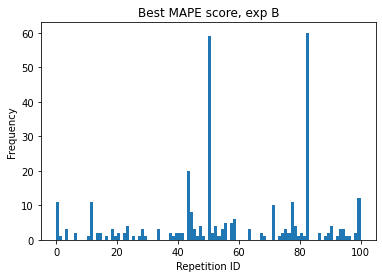

In [45]:
exp_b_min_bin, exp_b_best_reps = find_n_most_frequent_repetitions(exp_b_array, 5, np.argmin)
plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=exp_b_min_bin)
plt.title(f"Best {metric} score, exp B")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

exp_b_min_bin, exp_b_best_reps

### Both experiments

In [15]:
exp_both_array = calculate_timeseries_means([*exp_a, *exp_b], metric)
exp_both_array.shape

(200, 321, 1)

(array([  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  23,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  20,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0, 257,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   0

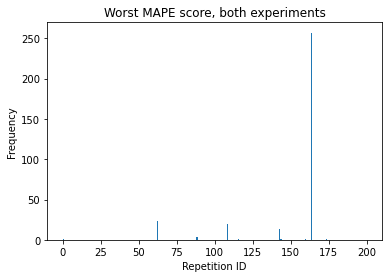

In [42]:
exp_both_max_bin, exp_both_worst_reps = find_n_most_frequent_repetitions(exp_both_array, 5, np.argmax)
plt.hist([i for i in range(200)], bins=200, range=(0, 200), weights=exp_both_max_bin)
plt.title(f"Worst {metric} score, both experiments")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

exp_both_max_bin, exp_both_worst_reps



(array([ 2,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0, 12,  0,  4,  2,  0,  3,
         0,  0,  0,  0,  2,  0,  1,  0,  0,  0,  3,  1,  1,  0,  0,  0,  1,
         0,  0,  0,  1,  0,  0,  1,  1,  0,  0,  1,  4,  0, 15,  6, 12,  1,
         0,  0,  0,  0,  8,  2,  0,  1,  3, 18,  0,  0,  0,  1,  0,  2,  1,
         0,  0,  0,  0,  1,  0,  0,  2,  2,  1,  0,  2,  0,  0,  0,  5,  0,
         0,  0,  0,  0,  4,  0,  0,  0,  1,  1,  1,  0,  4,  1,  1,  7,  0,
         0,  2,  0,  0,  1,  0,  0,  0,  1,  5,  0,  1,  1,  0,  0,  0,  0,
         1,  1,  0,  1,  2,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  2,  0,  1,  2,  1,  0, 16,  7,  1,  1,  1,  0,  0, 39,  1,  4,
         0,  3,  1,  0,  1,  3,  0,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,
         0,  3,  0,  0,  1,  0,  1,  4,  0,  1,  2,  0, 42,  0,  0,  0,  2,
         0,  1,  1,  2,  0,  1,  0,  2,  1,  0,  0,  1,  6]),
 array([ 47, 143,  60, 182, 150]))

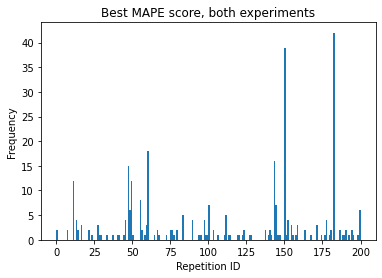

In [43]:
exp_both_min_bin, exp_both_best_reps = find_n_most_frequent_repetitions(exp_both_array, 5, np.argmin)
plt.hist([i for i in range(200)], bins=200, range=(0, 200), weights=exp_both_min_bin)
plt.title(f"Best {metric} score, both experiments")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

exp_both_min_bin, exp_both_best_reps

Looking at the histograms above it looks like a few repetitions are really bad across multiple timeseries. Similarly, some repetitions perform the best on multiple timeseries, but the best scores are spread across a greater number of repetititons in total compared to the worst scores.

# The N best and N worst metric-values for all timeseries. Which repetitions are most common?

In [18]:
top_n = 10

### Experiment A

array([  1.,   1.,   7.,   0., 119.,   2.,   7.,   0.,   0.,   0.,   0.,
         0.,   1.,   0.,  42.,   6.,   0.,   2.,   0.,   3.,  77.,   3.,
         0.,   2.,   0., 131.,   1.,   1.,   5.,   2., 151.,  35., 253.,
         3.,   1.,   0.,   1., 286.,   0.,   3.,   5.,   0.,   3.,   4.,
         0.,   0.,   5.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,  12.,
         0.,   0.,   0.,   0.,   0.,   0.,   2., 212.,  73.,   0.,   0.,
         1.,   1., 287., 136.,   3.,  71., 255.,   8.,   0.,   0.,   5.,
         3.,   1.,   4.,   0., 281.,   0.,   0., 141.,   0.,  16.,  12.,
       122.,   0.,   0.,   0.,  73., 152.,   0.,  38.,   0.,   0.,   0.,
       136.])

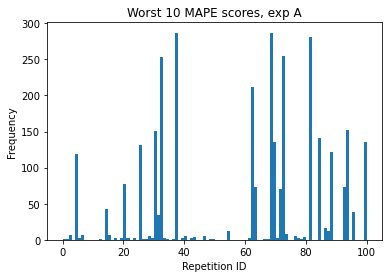

In [48]:
a_indexes_worst, exp_a_10_worst = np.unique(np.argsort(exp_a_array, axis=0)[-top_n:], return_counts=True)
exp_a_10_worst_count = count_repetitions_among_top_n(a_indexes_worst, exp_a_10_worst, 100)
plt.title(f"Worst 10 {metric} scores, exp A")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=exp_a_10_worst_count)

exp_a_10_worst_count

array([ 10,  91,   9,   4,   3,   2,   3,   4,  21,  90,  37,  98,  15,
       117,  24,   6,  26,   7,  10,  32,   2,  22,  67,  24,  64,   6,
        42,  74,  26,  78,   4,   8,   6,   2,   6,  39,   4,   9,   5,
         2,  19,  29,   5,   9,   3, 148,   6, 112, 149,  94,  15,  23,
         3,   9,  12,  66,  88,  35,  27,  97, 191,   7,   4,   2,  41,
        18,  67, 101,   2,   6,  13,   9,   5,   5,   5,  95,  21,  11,
        78,  41,  20,   6,  20,  69,   7,   7,   9,  14,   3,  87,   5,
        35,   3,   4,   4,  21,  14,  90,  17,   5])

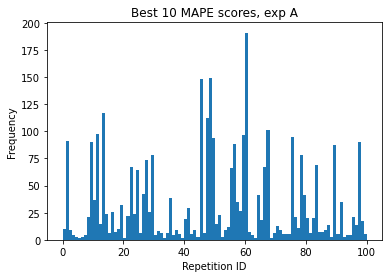

In [49]:
a_indexes_best, exp_a_10_best = np.unique(np.argsort(exp_a_array, axis=0)[:top_n], return_counts=True)
exp_a_10_best_count = count_repetitions_among_top_n(a_indexes_best, exp_a_10_best, 100)
plt.title(f"Best 10 {metric} scores, exp A")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=exp_a_10_best_count)

exp_a_10_best


### Experiment B

array([  0.,   1.,   0.,   1.,   1.,   1., 245.,   0., 303.,   0.,   1.,
         7.,   0.,   9.,   0.,  14.,   0.,   8., 258.,  16.,   0.,   0.,
         3.,   0., 255.,   0.,   2.,   1.,   5., 292.,   1.,   4.,   1.,
         1.,   0.,   1.,  66.,   0.,   0.,   0.,   1.,   4., 276.,   1.,
         1.,   2.,   0.,   0.,   0., 192.,   0.,  54.,   0.,   0., 100.,
         0.,   0.,   0.,   0.,  18.,   7.,   6.,   0., 304., 272.,   0.,
         1.,   0.,   1.,   0.,  31.,   0.,  14.,  68.,   5.,   1.,   0.,
         0.,   0.,  11.,   1.,   0.,   1.,   0.,   0., 283.,   0.,   4.,
        17.,   0.,   0.,   0.,  26.,   1.,   1.,   0.,   1.,   0.,   2.,
         6.])

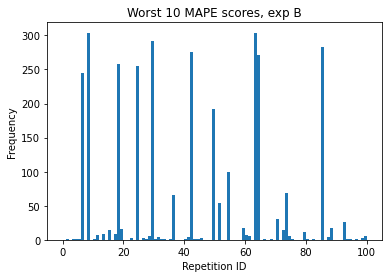

In [50]:
b_indexes_worst, exp_b_10_worst = np.unique(np.argsort(exp_b_array, axis=0)[-top_n:], return_counts=True)
exp_b_10_worst_count = count_repetitions_among_top_n(b_indexes_worst, exp_b_10_worst, 100)
plt.title(f"Worst 10 {metric} scores, exp B")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=exp_b_10_worst_count)

exp_b_10_worst_count


array([120.,  23.,  16., 105.,   9.,   9.,   7.,   4.,   1.,   6.,  13.,
        46.,   4.,  23.,  91.,  14.,  30.,   4.,   9.,   3.,   9.,  16.,
        56.,  30.,   6.,  31.,  11.,  84.,   9.,   4.,  11.,   0.,   8.,
        86.,   8.,   6.,   2.,  65.,  11.,  83.,  66.,  22.,   6., 111.,
        97.,  62.,  29.,  57.,   4.,   2., 204.,  18.,  15.,  53.,   7.,
        39.,  17.,  93.,  52.,   6.,   8.,   6.,  12.,   8.,   8.,  62.,
         6.,  29.,   6.,   7.,   3.,  56.,  10.,  10.,  10.,  66.,  16.,
        90.,  10.,  10.,  82.,  13., 179.,  42.,   7.,   5.,  26.,   7.,
         9.,  47.,  27.,  16.,   5., 103.,  12.,  14.,  28.,  19.,  55.,
        48.])

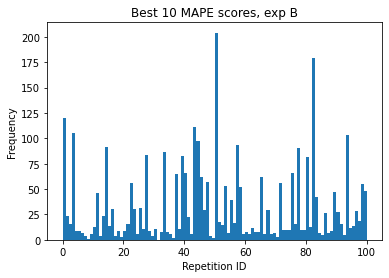

In [51]:
b_indexes_best, exp_b_10_best = np.unique(np.argsort(exp_b_array, axis=0)[:top_n], return_counts=True)
exp_b_10_best_count = count_repetitions_among_top_n(b_indexes_best, exp_b_10_best, 100)
plt.title(f"Best 10 {metric} scores, exp B")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=exp_b_10_best_count)

exp_b_10_best_count

### Both experiments

array([  0.,   0.,   0.,   0.,  11.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   8.,   1.,   0.,   0.,   0.,   1.,   7.,   0.,
         0.,   0.,   0.,  57.,   0.,   0.,   1.,   0.,   4.,   0., 194.,
         1.,   0.,   0.,   0., 247.,   0.,   1.,   2.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
         0.,   0.,   0.,   0.,   0.,   0.,   1., 110.,  11.,   0.,   1.,
         1.,   1., 167.,  26.,   1.,  16.,  12.,   2.,   0.,   0.,   1.,
         0.,   0.,   1.,   0., 225.,   0.,   0.,  13.,   0.,   4.,   3.,
        45.,   0.,   0.,   0.,  14.,   0.,   0.,   9.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   1.,   0.,   0.,  62.,   0., 232.,   0.,
         0.,   0.,   0.,   2.,   0.,   6.,   0.,   0., 154.,   1.,   0.,
         0.,   1.,   0.,  67.,   0.,   1.,   0.,   1., 270.,   0.,   0.,
         0.,   0.,   0.,   0.,  36.,   0.,   0.,   0.,   0.,   0., 210.,
         1.,   0.,   0.,   0.,   0.,   0.,  80.,   

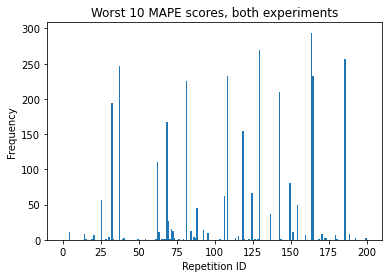

In [52]:
both_indexes_worst, exp_both_10_worst = np.unique(np.argsort(exp_both_array, axis=0)[-top_n:], return_counts=True)
exp_both_10_worst_count = count_repetitions_among_top_n(both_indexes_worst, exp_both_10_worst, 200)
plt.title(f"Worst 10 {metric} scores, both experiments")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(200)], bins=200, range=(0, 200), weights=exp_both_10_worst_count)

exp_both_10_worst_count


array([  6.,  31.,   8.,   3.,   3.,   1.,   1.,   2.,  15.,  31.,   9.,
        54.,   3.,  72.,   7.,   2.,  14.,   1.,   5.,  13.,   2.,  14.,
         7.,   7.,  25.,   3.,  16.,  29.,  16.,  38.,   3.,   5.,   4.,
         1.,   4.,  19.,   3.,   9.,   2.,   0.,   6.,   7.,   1.,   5.,
         3.,  85.,   4.,  66., 104.,  68.,   3.,   5.,   2.,   3.,   4.,
        42.,  43.,  18.,  16.,  48., 134.,   3.,   2.,   2.,  18.,   7.,
        14.,  31.,   1.,   2.,   0.,   2.,   4.,   2.,   1.,  50.,   9.,
         5.,  19.,  19.,   8.,   6.,   4.,  26.,   6.,   0.,   4.,   7.,
         2.,  46.,   3.,  11.,   1.,   3.,   3.,  14.,   7.,  49.,   6.,
         2.,  62.,  12.,   8.,  50.,   3.,   6.,   4.,   0.,   0.,   2.,
         3.,  27.,   1.,  10.,  44.,  10.,  14.,   1.,   5.,   2.,   5.,
         9.,  23.,  12.,   2.,  14.,   6.,  20.,   6.,   3.,   6.,   1.,
         5.,  40.,   1.,   4.,   1.,  33.,   4.,  28.,  29.,  13.,   2.,
        76.,  54.,  30.,  13.,  37.,   3.,   1., 15

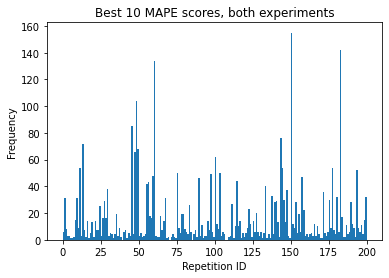

In [53]:
both_indexes_best, exp_both_10_best = np.unique(np.argsort(exp_both_array, axis=0)[:top_n], return_counts=True)
exp_both_10_best_count = count_repetitions_among_top_n(both_indexes_best, exp_both_10_best, 200)
plt.title(f"Best 10 {metric} scores, both experiments")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(200)], bins=200, range=(0, 200), weights=exp_both_10_best_count)

exp_both_10_best_count

These plots show that, similarly to the plots for the single best/worst scores, some repetitions score best/worst across a lot of timeseries. It is interesting that the worst repetitions are present in the worst 10 for up to 300 of 321 timeseries, while the best repetitions are only present in up to 200 of 321 timeseries.

### What happens when we look at the 10 repetitions most often in the middle of the rankings? I.e. the ones with the 45 - 55 best scores.
### Experiment A

array([  9.,  14.,  23.,  16.,   4.,  14.,  58.,  22.,  32.,  25.,  30.,
        10.,  78.,  10.,  49.,  12.,  32.,  50.,  29.,  29.,  13.,  44.,
        16.,  52.,  16.,  13.,  38.,  22.,  53.,  20.,   7.,  17.,   6.,
         3.,  20.,  52., 125.,   1.,  74.,  31.,  58.,  44.,  34.,  24.,
        98.,   7.,  51.,   8.,   9.,  26.,  28.,   9.,  85.,  82.,  34.,
        30.,  24.,  71., 101.,  15.,   6.,  78.,   7.,  15.,  41., 100.,
        18.,  10.,   2.,   9.,  39.,  18.,   4.,   9.,  99.,  20.,  42.,
        27.,  16.,  26.,  82.,   4.,  40.,  19.,   3.,  70.,  35.,  34.,
        19.,  13.,  29.,  30.,  31.,   6.,  17.,  25.,  72.,  27.,  58.,
         3.])

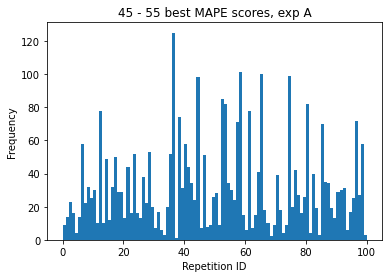

In [54]:
a_indexes_middle, exp_a_10_middle = np.unique(np.argsort(exp_a_array, axis=0)[45:55], return_counts=True)
exp_a_10_middle_count = count_repetitions_among_top_n(a_indexes_middle, exp_a_10_middle, 100)
plt.title(f"45 - 55 best {metric} scores, exp A")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=exp_a_10_middle_count)

exp_a_10_middle_count

### Experiment B

array([ 11.,  45.,  67.,  24.,  27.,  51.,   1.,  29.,   1.,  96.,  10.,
        32.,  74.,  31.,  11.,  38.,  47.,  24.,   4.,  30.,  48.,  25.,
        36.,  51.,   4.,  48.,  43.,  12.,  45.,   0.,  11.,  42.,  97.,
        26.,  34.,  36.,   9.,  18.,  53.,  13.,  24.,  19.,   0.,  11.,
        27.,  26.,  40.,  34., 100.,   3.,   9.,  22.,  36.,  37.,   7.,
        48.,  49.,   7.,  46.,  33.,  30.,  25.,  55.,   0.,   1.,  27.,
        34.,  59.,  98.,  27.,   9.,  32.,  41.,   3.,  14.,  39.,  27.,
        21.,  36.,  33.,  18.,  53.,  20.,  46.,  51.,   3.,  30.,  37.,
        37.,  41.,  49.,  57.,   8.,  35.,  59.,  23.,  42.,  41.,  33.,
        34.])

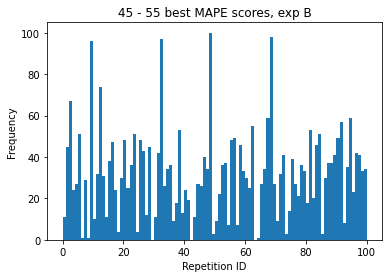

In [55]:
b_indexes_middle, exp_b_10_middle = np.unique(np.argsort(exp_b_array, axis=0)[45:55], return_counts=True)
exp_b_10_middle_count = count_repetitions_among_top_n(b_indexes_middle, exp_b_10_middle, 100)
plt.title(f"45 - 55 best {metric} scores, exp B")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=exp_b_10_middle_count)

exp_b_10_middle_count

### Both experiments

array([ 2., 39.,  2.,  4.,  1.,  2.,  2.,  8.,  6., 28., 34., 31., 10.,
       37.,  1.,  6., 26.,  7.,  6., 24.,  1.,  7., 34., 16., 45.,  3.,
       32., 23.,  9., 24.,  2.,  5.,  1.,  2.,  3., 26.,  9.,  0.,  4.,
        2., 11., 23., 18., 43.,  9., 15., 15., 36., 22., 16., 17., 67.,
       14., 14., 15., 28., 30., 10., 25., 34., 15.,  8.,  3.,  0., 21.,
       15., 36., 32.,  0.,  5., 39.,  0.,  0.,  2., 12., 22., 24., 20.,
       19., 21., 13.,  0., 26., 29.,  0.,  7., 13., 11.,  2., 25.,  6.,
       46.,  2.,  2.,  3., 11., 13., 19., 14.,  3., 31., 11., 20., 23.,
        8., 25.,  1., 10.,  0., 23.,  3., 12.,  7., 18., 31., 11., 18.,
        3.,  0., 27., 17., 66., 28., 23.,  2., 13., 27., 30., 14.,  0.,
        4.,  2., 13., 20.,  8., 12.,  4., 26., 19., 24., 29.,  3.,  1.,
       33., 14., 19., 24., 25.,  5.,  1., 16.,  6., 10., 26.,  0., 32.,
       15., 33., 37., 12., 11., 16.,  6.,  0.,  1., 28., 15., 19., 34.,
        9.,  2., 24.,  9.,  2.,  2., 19., 11., 28., 11., 16., 25

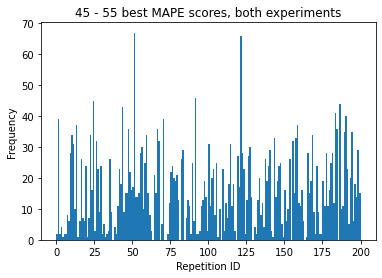

In [56]:
both_indexes_middle, exp_both_10_middle = np.unique(np.argsort(exp_both_array, axis=0)[45:55], return_counts=True)
exp_both_10_middle_count = count_repetitions_among_top_n(both_indexes_middle, exp_both_10_middle, 200)
plt.title(f"45 - 55 best {metric} scores, both experiments")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(200)], bins=200, range=(0, 200), weights=exp_both_10_middle_count)

exp_both_10_middle_count

Looking at these plots it seems like the repetitions that get scores that are among the 45 - 55 best per timeseries varies more than both the 10 best and 10 worst repetitions per timeseries.